In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# 侵蚀法字符检测函数：通过侵蚀法检测二值化图像中的字符
def character_detection_by_erosion(binary_license_plate, templates):
    detected_characters = []
    for char, template in templates.items():
        eroded = cv2.erode(binary_license_plate, template)
        if np.sum(eroded) > 0:
            detected_characters.append(char)
            dilated = cv2.dilate(eroded, template)
            plt.imshow(dilated, cmap='gray')
            plt.title(f'Detected Character: {char}')
            plt.show()
    return detected_characters

In [21]:
# 命中-丢失滤波器字符检测函数：通过命中-丢失滤波器检测二值化图像中的字符
def hit_miss_detection(binary_license_plate, templates):
    detected_characters = []
    for char, template in templates.items():
        if template is None:
            print(f"Template for character {char} is None")
            continue
        # 使用开运算和闭运算进行处理
        morphed = cv2.morphologyEx(binary_license_plate, cv2.MORPH_OPEN, template)
        morphed = cv2.morphologyEx(morphed, cv2.MORPH_CLOSE, template)
        if np.sum(morphed) > 0:
            detected_characters.append(char)
            plt.imshow(morphed, cmap='gray')
            plt.title(f'Detected Character (Morphological): {char}')
            plt.show()
    return detected_characters

In [22]:
# 最小值秩滤波器字符检测函数：通过最小值秩滤波器检测二值化图像中的字符
def minimum_rank_filter(binary_license_plate, templates):
    detected_characters = []
    for char, template in templates.items():
        rank_filtered = cv2.rankFilter(binary_license_plate, 1)
        if np.sum(rank_filtered) > 0:
            detected_characters.append(char)
            plt.imshow(rank_filtered, cmap='gray')
            plt.title(f'Detected Character (Rank Filter): {char}')
            plt.show()
    return detected_characters

In [23]:
# 处理第二题的图像
clean_license_plate = binarize_image('./figs/pro2_license_plate_clean.png')
noisy_license_plate = binarize_image('./figs/pro2_license_plate_noisy.png')

In [24]:
# 读取字符模板
templates = {}
for char in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789':
    template = cv2.imread(f'pro2_character_templates/{char}.png', cv2.IMREAD_GRAYSCALE)
    _, templates[char] = cv2.threshold(template, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

Character detection by erosion (clean license plate):


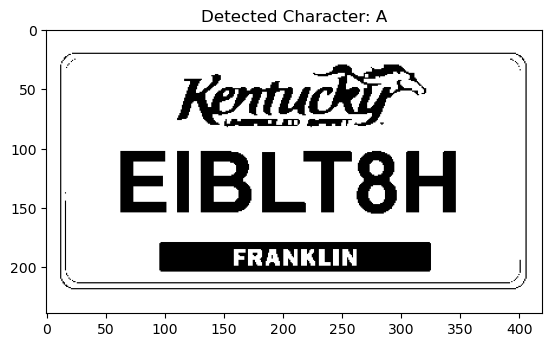

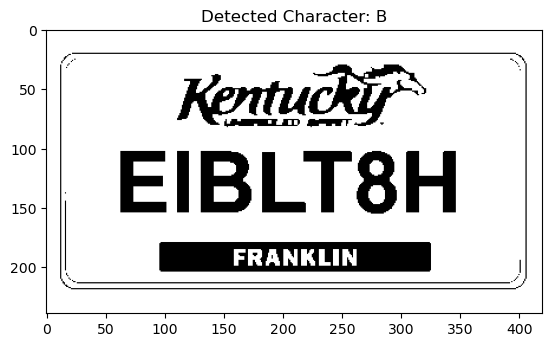

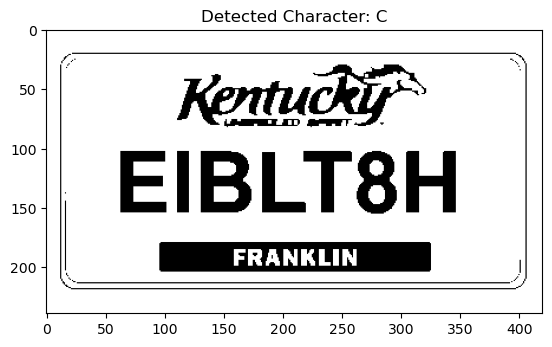

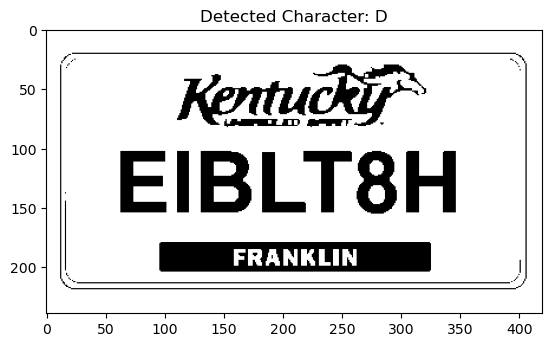

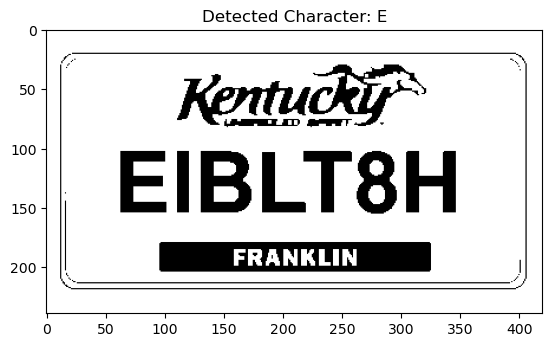

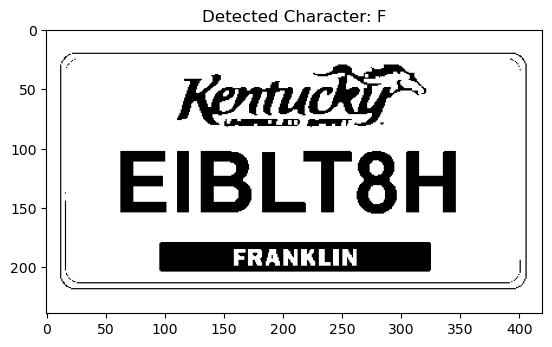

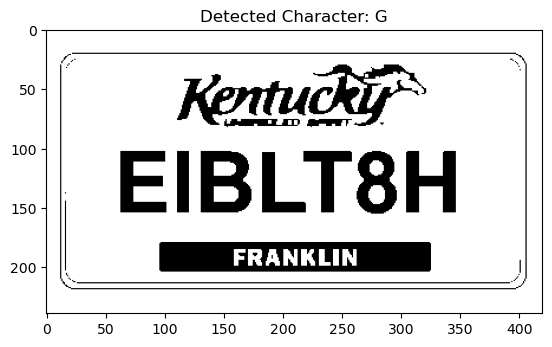

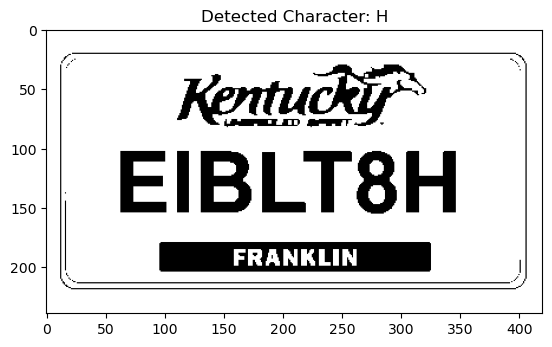

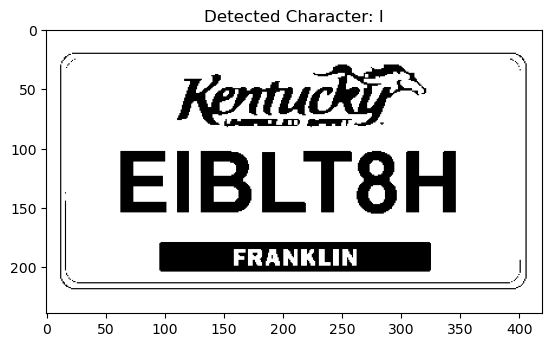

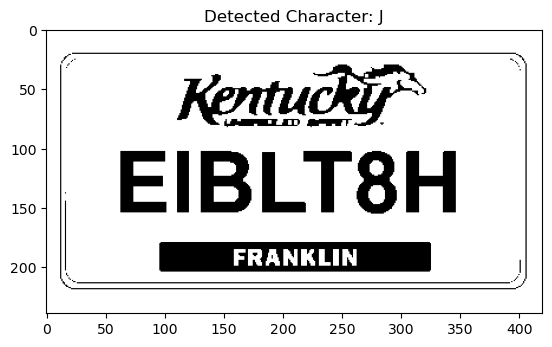

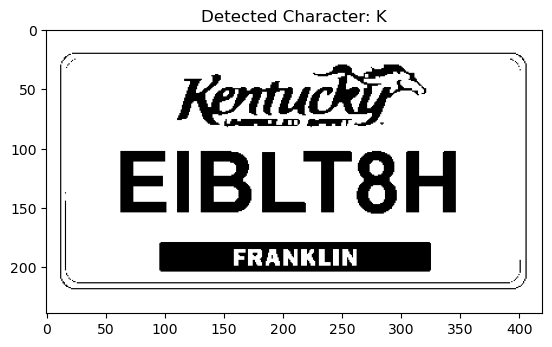

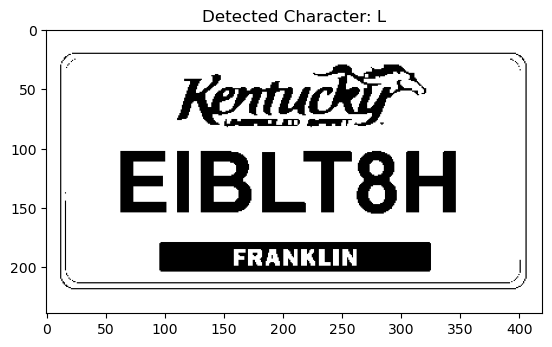

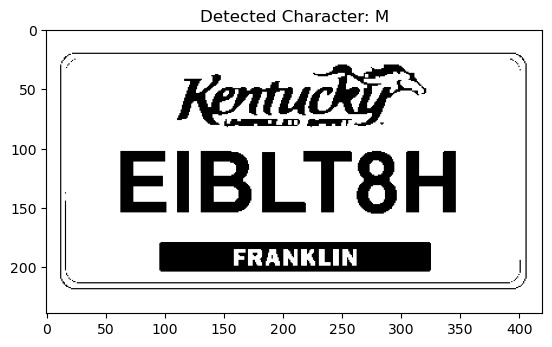

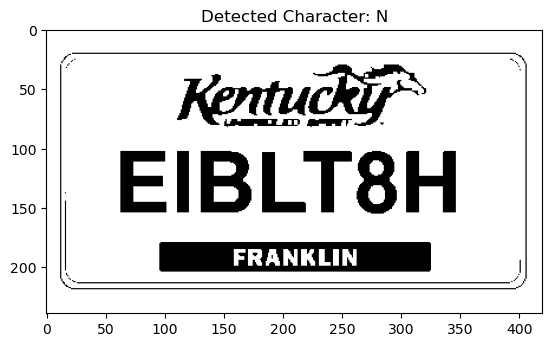

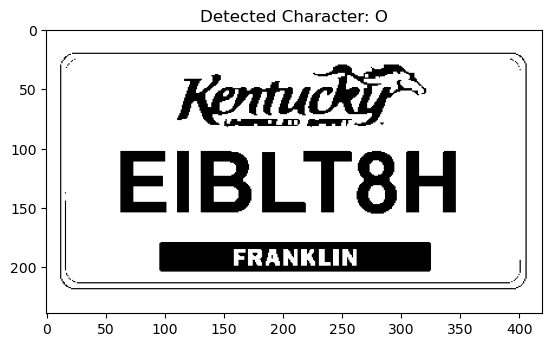

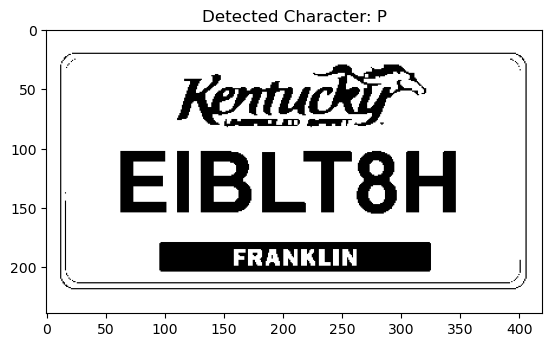

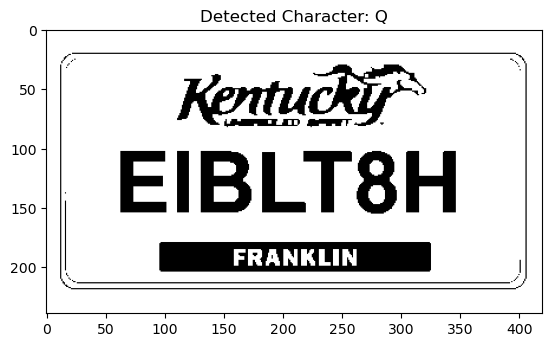

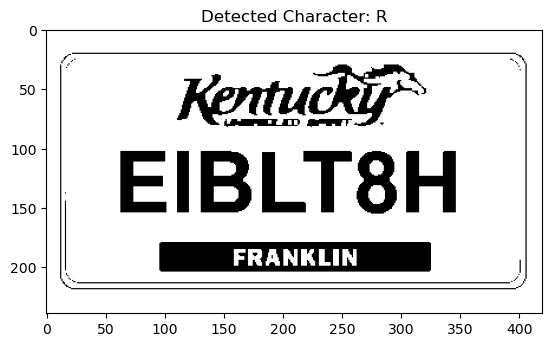

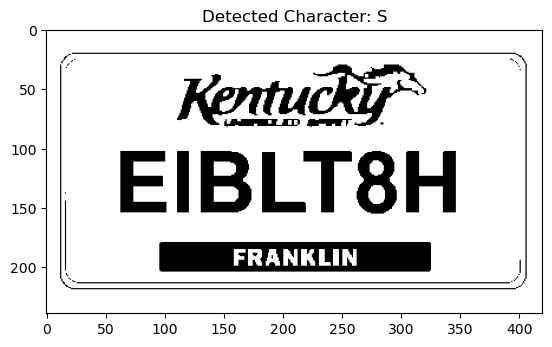

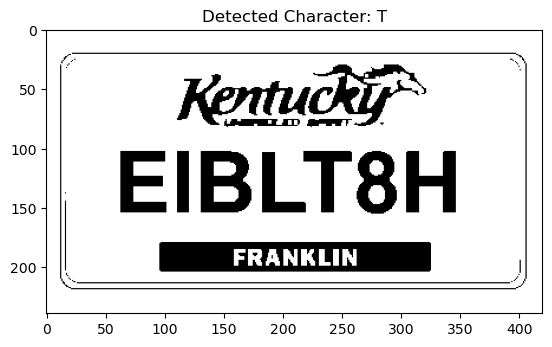

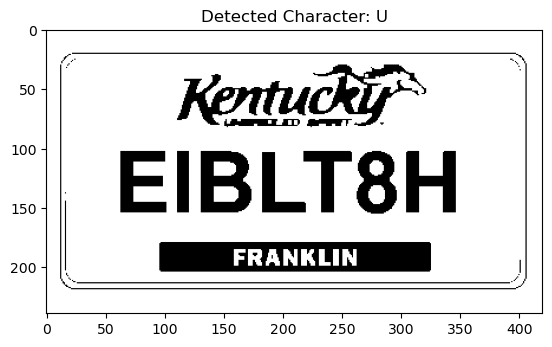

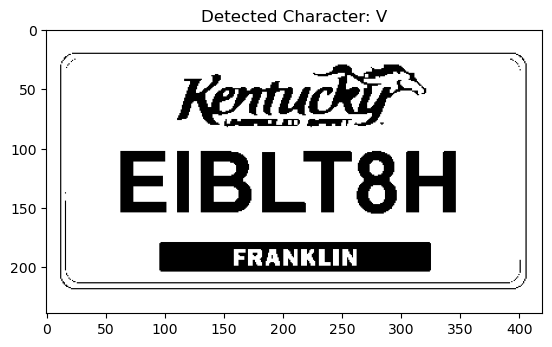

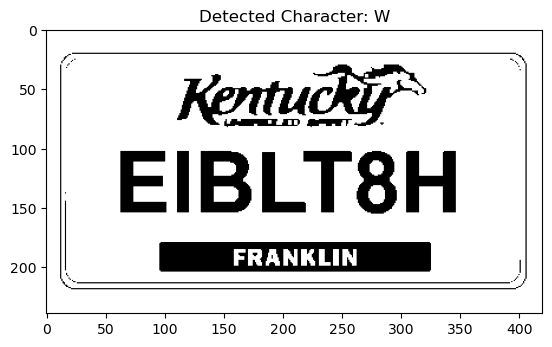

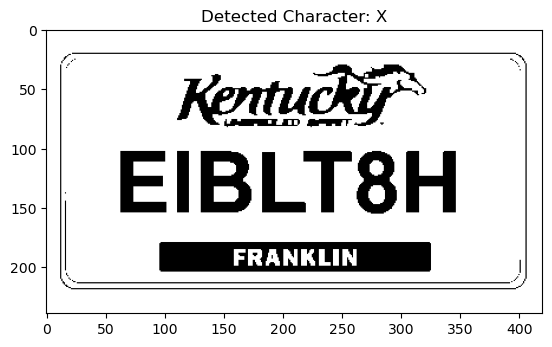

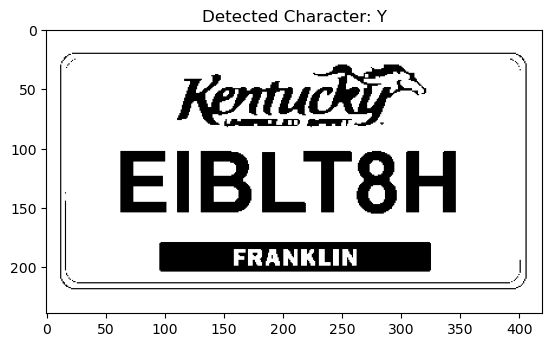

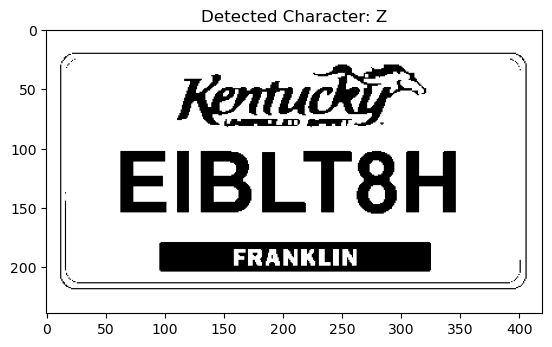

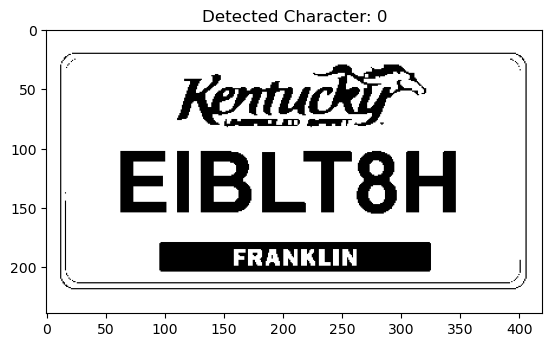

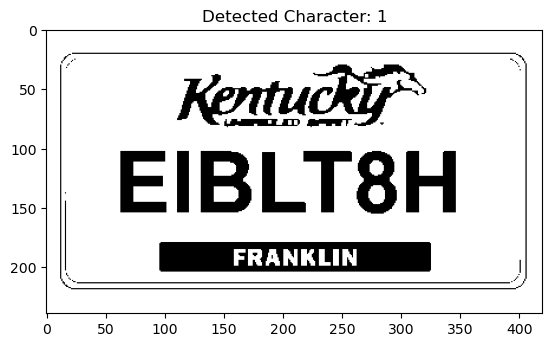

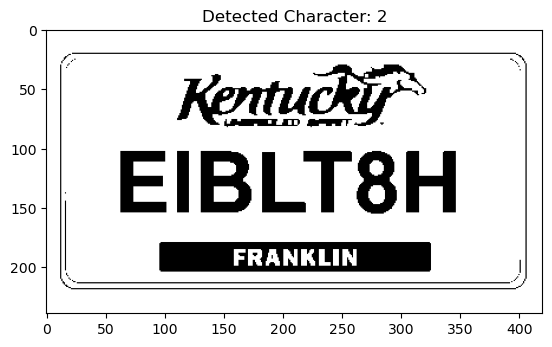

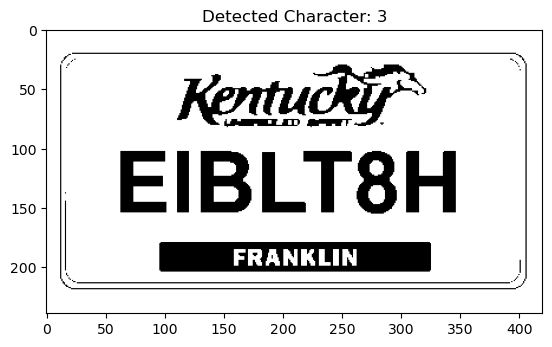

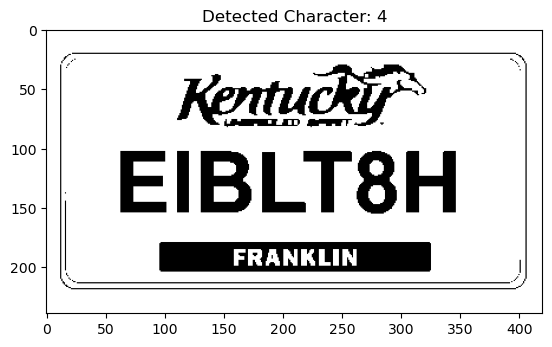

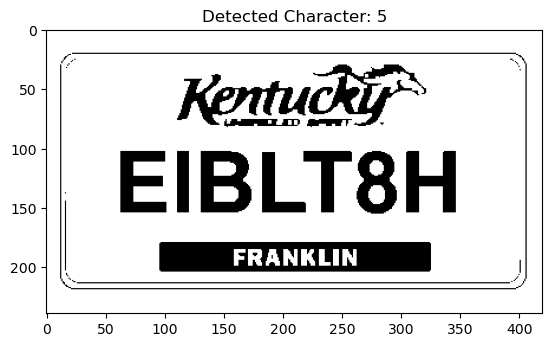

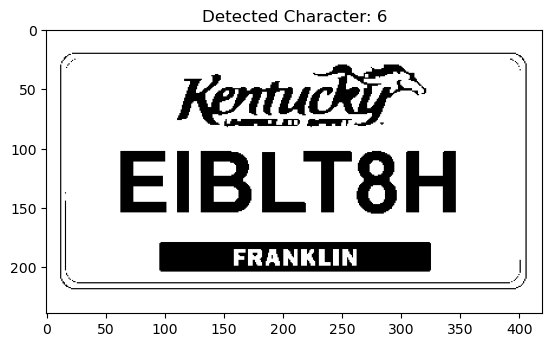

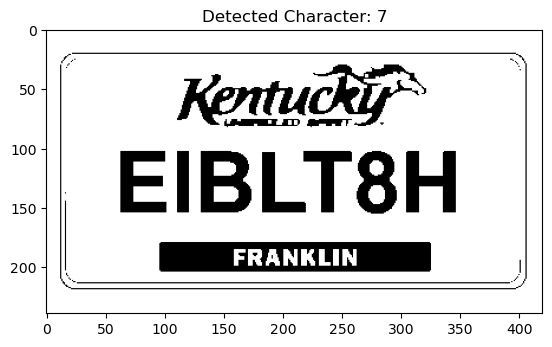

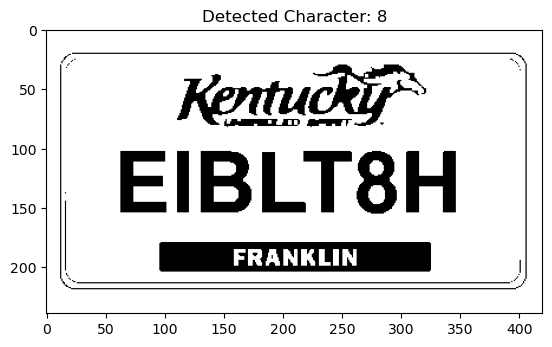

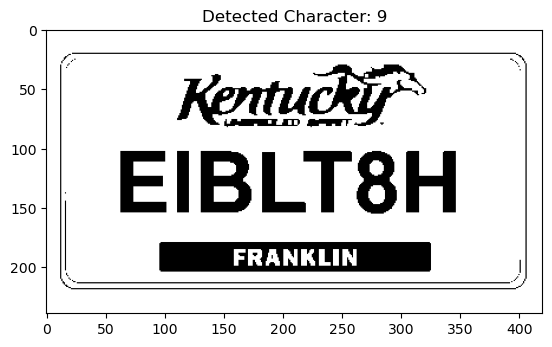

Character detection by hit-miss filter (clean license plate):
Template for character A is None
Template for character B is None
Template for character C is None
Template for character D is None
Template for character E is None
Template for character F is None
Template for character G is None
Template for character H is None
Template for character I is None
Template for character J is None
Template for character K is None
Template for character L is None
Template for character M is None
Template for character N is None
Template for character O is None
Template for character P is None
Template for character Q is None
Template for character R is None
Template for character S is None
Template for character T is None
Template for character U is None
Template for character V is None
Template for character W is None
Template for character X is None
Template for character Y is None
Template for character Z is None
Template for character 0 is None
Template for character 1 is None
Template for c

AttributeError: module 'cv2' has no attribute 'rankFilter'

In [25]:
# 字符检测 - 侵蚀法
print("Character detection by erosion (clean license plate):")
detected_clean_chars_erosion = character_detection_by_erosion(clean_license_plate, templates)

# 字符检测 - 命中-丢失滤波器
print("Character detection by hit-miss filter (clean license plate):")
detected_clean_chars_hitmiss = hit_miss_detection(clean_license_plate, templates)

# 字符检测 - 命中-丢失滤波器 (噪声车牌图像)
print("Character detection by hit-miss filter (noisy license plate):")
detected_noisy_chars_hitmiss = hit_miss_detection(noisy_license_plate, templates)

# 字符检测 - 最小值秩滤波器 (噪声车牌图像)
print("Character detection by minimum rank filter (noisy license plate):")
detected_noisy_chars_rank = minimum_rank_filter(noisy_license_plate, templates)